# Setup files

In [51]:
#Setup files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#This libary help to read excel ordinal datatime
import xlrd
#Improt subplot package and go package of ploty express
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Assign dataset
df_trans= pd.read_csv("Transaction_ID.csv")
df_customerid = pd.read_csv("Customer_ID.csv")
df_city= pd.read_csv("City.csv")
df_cab = pd.read_csv("Cab_Data.csv")
#Merge 3 dataset cab, trans, cus into df_merge
df_merge = df_trans.merge(df_customerid, on="Customer ID").merge(df_cab, on="Transaction ID")

#City.csv file
#Use regex to remove "," with replace and astype to change string to int for Population and users
user_df= df_city
user_df[['Population','Users']]= user_df[['Population','Users']].replace(r'\D+', '', regex=True).astype('int64')

# Checking Missing and Duplicated value in datasets 

In [52]:
#Check for missing data
for col in df_merge.columns:
    pct_missing = np.mean(df_merge[col].isnull())
    print('{} - {}'.format(col,pct_missing))
    
#No missing data


Transaction ID - 0.0
Customer ID - 0.0
Payment_Mode - 0.0
Gender - 0.0
Age - 0.0
Income (USD/Month) - 0.0
Date of Travel - 0.0
Company - 0.0
City - 0.0
KM Travelled - 0.0
Price Charged - 0.0
Cost of Trip - 0.0


In [53]:
for col in df_customerid.columns:
    pct_missing = np.mean(df_customerid[col].isnull())
    print('{} - {}'.format(col,pct_missing))
#No missing data

Customer ID - 0.0
Gender - 0.0
Age - 0.0
Income (USD/Month) - 0.0


# Prepare datasets

In [54]:
#Change date to datetime
#Definite a function to read excel ordinal date
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
    
df_merge['Date'] = pd.to_datetime(df_merge['Date of Travel'].apply(read_date), errors='coerce', format='%Y-%m-%d')

#Rename columns
df_merge.rename(columns={"Transaction ID":"Transaction"}, inplace=True)
#Create Month and year column to get data from Date column
months=[]
years =[]
for i in range(len(df_merge['Date'])):
    months.append(df_merge['Date'][i].month)
    years.append(df_merge['Date'][i].year)
df_merge['Month'] = months
df_merge['Year'] = years
df_merge['Day of Week'] = df_merge['Date'].dt.day_name()

In [55]:
#Prepare subdatasets 
#Split data into Yellow and Pink Company
Pink_df = df_merge[df_merge['Company']=='Pink Cab']
Yellow_df = df_merge[df_merge['Company']=='Yellow Cab']

## Check Travel Frequency

In [56]:

#Creat plot by months
pink_plot_M = df_merge[df_merge.Company=='Pink Cab'].groupby(['Month']).Transaction.count()
yellow_plot_M = df_merge[df_merge.Company=='Yellow Cab'].groupby(['Month']).Transaction.count()

#Create plot by days of a week
pink_plot_D = df_merge[df_merge.Company=='Pink Cab'].groupby(['Day of Week']).Transaction.count()
yellow_plot_D = df_merge[df_merge.Company=='Yellow Cab'].groupby(['Day of Week']).Transaction.count()

### Is there any pattern for travel frequency by Months?
#### Plot travel frequency by Months


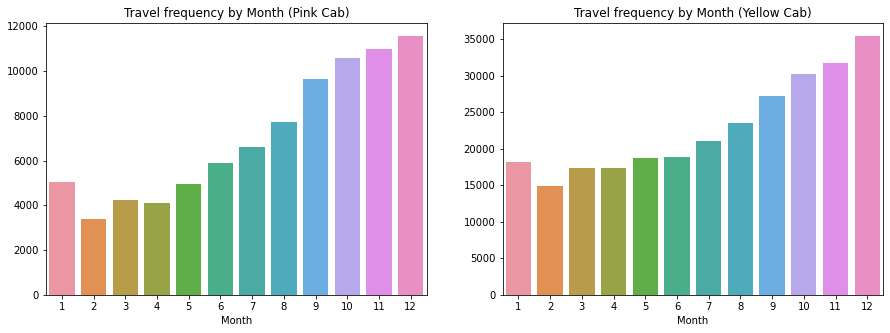

In [57]:
#Plot travel frequency by Months
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=pink_plot_M.index,y=pink_plot_M.values )
plt.title('Travel frequency by Month (Pink Cab)')

plt.subplot(122)
sns.barplot(x=yellow_plot_M.index,y=yellow_plot_M.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

Yellow Cab has total higher travels compared to Pink Cab. In summertime (June-August) to December, both companies has been experienced the increasing travel frequency, which the higest travel's month is December. December was the busiest month for travelling in both companies because of the biggest holiday in the US: Christmas and winterbreak seasons


### Is there any pattern for travel frequency by Days of a week?

#### Plot travel frequency by Days of a week


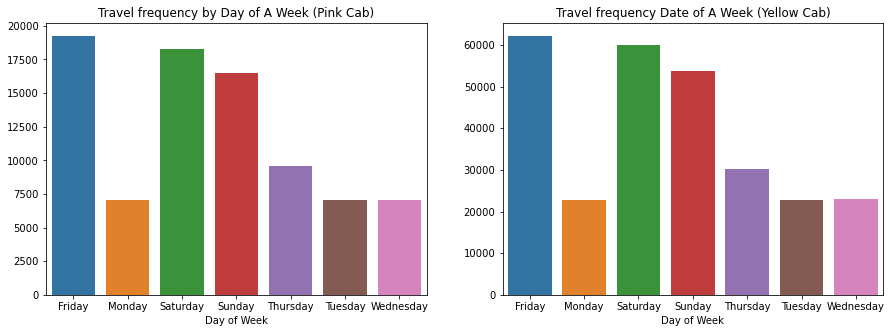

In [58]:
#Plot travel frequency by Day of a week
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=pink_plot_D.index,y=pink_plot_D.values )
plt.title('Travel frequency by Day of A Week (Pink Cab)')

plt.subplot(122)
sns.barplot(x=yellow_plot_D.index,y=yellow_plot_D.values)
plt.title('Travel frequency Date of A Week (Yellow Cab)')
plt.show()

Both companies have the same pattern for day of a week

### Is there any daily pattern for Counts of trip in comparison of companies?

#### Count of trips by Days of a week 

In [59]:
temp_df = df_merge.groupby(['Company','Day of Week']).agg({"Transaction":"count"}).reset_index()
#create a mapping of the sort order
sort_order = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6,'Sunday':7}

#create new column with the sort order
temp_df['sort_columns'] = temp_df['Day of Week'].map(sort_order)

#sort with sort_column

temp_df = temp_df.sort_values('sort_columns').drop('sort_columns',axis=1).reset_index(drop=True)

fig = px.bar(temp_df, x="Day of Week", y="Transaction", color= "Company", barmode='group', title="Count of trips by Days of week",
             color_discrete_map={'(?)':'black', 'Pink Cab':'#FC1CBF', 'Yellow Cab':'#FBE426'})
fig.update_yaxes(title_text='Count of Trips')
fig.show()

Overall, Yellow Cab is the top choice for customer when riding in day of a week. In the weekend from Friday to Sunday, the customers riding with both companies are higher compared to other days. Yellow cab accounted most of the market compared to Pink Cab only accounted for a portion of cab market. 


# Creating Master dataset from 4 datasets


In [92]:
# Merge City.csv to the rest of data to create Master Data for later analysis
data = user_df.merge(df, on ="City")

# Check Profit in both companies

In [93]:
#Rename Income column 
data.rename(columns={"Income (USD/Month)" : "Income"}, inplace=True)
#Profit aftet deduct Cost
data['Profit'] = (data['Price Charged']-data['Cost of Trip'])
data.head(n=5)

,City,Population,Users,Transaction,Customer ID,Payment_Mode,Gender,Age,Income,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Date,Month,Year,Day of Week,Profit
0,NEW YORK NY,8405837,302149,10000139,2416,Cash,Male,28,21399,42377,Pink Cab,17.85,242.90,198.1350,2016-01-08,1,2016,Friday,44.7650
1,NEW YORK NY,8405837,302149,10006684,2416,Cash,Male,28,21399,42405,Yellow Cab,34.34,1099.35,482.1336,2016-02-05,2,2016,Friday,617.2164
2,NEW YORK NY,8405837,302149,10015798,2416,Card,Male,28,21399,42442,Yellow Cab,19.20,559.30,264.9600,2016-03-13,3,2016,Sunday,294.3400
3,NEW YORK NY,8405837,302149,10074689,2416,Card,Male,28,21399,42621,Yellow Cab,14.84,322.28,179.8608,2016-09-08,9,2016,Thursday,142.4192
4,NEW YORK NY,8405837,302149,10078883,2416,Card,Male,28,21399,42631,Pink Cab,37.08,728.27,393.0480,2016-09-18,9,2016,Sunday,335.2220


## Which company has higher Price Charged?

In [61]:
#Check overall Price in both companies
Overall_price = data['Price Charged'].describe()
Pink_price = Pink_df['Price Charged'].describe()
Yellow_price = Yellow_df['Price Charged'].describe()

Price = pd.DataFrame({'Overall': Overall_price.values,
                  'PinkCab': Pink_price.values,
                  'YellowCab': Yellow_price.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
Price

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,423.443311,310.800856,458.181990
Std. Dev.,274.378911,181.995661,288.386166
Min,15.600000,15.600000,20.730000
25%,206.437500,159.970000,226.680000
50%,386.360000,298.060000,425.060000
75%,583.660000,441.505000,633.880000
Max,2048.030000,1623.480000,2048.030000


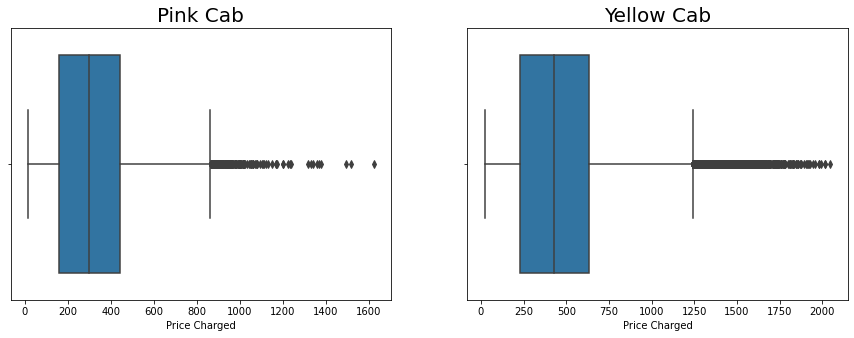

In [62]:
#Outliers
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x= Pink_df['Price Charged'])
plt.title('Pink Cab', fontsize=20)
plt.subplot(122)
sns.boxplot(x= Yellow_df['Price Charged'])
plt.title('Yellow Cab', fontsize=20)
plt.show()


Yellow Cab has more expensive Price Charged than Pink Cab
We will keep the outliers because these outliers are due to the fee usage of expensive cars

## Which company has higher profit?

Profit is identified as Revenue - Expense and in here Profit= Price Chared - Cost of Travel

In [63]:
#Groupby Year, and Company
year_df = data.groupby(["Company", "Year"]).agg({'Profit': sum, 'KM Travelled': sum, "Transaction" : "count"})

year_df.rename(columns={"Transaction": "No of Customers", "KM Travelled" : "KM"}, inplace=True)
#Profit per trip

year_df ['profit_trip']= round(year_df['Profit'] / year_df ['No of Customers'],2)
#Profit per KM travlled
year_df ['profit_km'] = round(year_df ['Profit'] / year_df ['KM'],2)

In [64]:
#Overall Profit by yearly
profit_yr= year_df.reset_index().pivot(columns='Company', index='Year', values='Profit')
profit_yr.index = profit_yr.index.astype(str)

#Create plot

fig = px.bar(profit_yr, labels=dict(value="Profit", Company="Cab Company"))
fig.update_layout(barmode="group")
fig.update_layout(title_text='Profit from Pink and Yellow Cab Company between 2016 and 2018')
fig.show()

In general, Yellow Cab has higher profit from 2016 to 2018 compared to Pink Cab. 
From 2016 to 2017, both Yellow and Pink Cab had been experienced the increase in Profit. For Yellow Cab, 2016 was the most successful year with roughly $16.57 million dollar compared to nearly $2 million from Pink Cab. 

However, 2018 had been experienced the dramatically decrease in profit of both company but it was a big impact for their company with the loss up to nearly $ 3 million. Pink Cab had been experienced the same downtrend in 2018 but they only lost $500k. 

Overall, Yellow Cab still the biggest Cab company dominated the market from 2016 to 2018, which up to 70% percentage of the martket while Pink Cab only accounted for 30$ of the martket. 



### How much profit each company can generate per trip and per KM

In [65]:
#Avg_per KM
avg_km= year_df.reset_index().pivot(columns='Company', index='Year', values='profit_km')
avg_km.index = avg_km.index.astype(str)
#Avg per Trip
avg_trip= year_df.reset_index().pivot(columns='Company', index='Year', values='profit_trip')
avg_trip.index = avg_km.index.astype(str)

#Create subplot 
bar1 = px.bar(avg_km,
              labels=dict(value="Average Profit per KM", Company="Cab Company"))
bar2 = px.bar(avg_trip,
              labels=dict(value="Average Profit per KM", Company="Cab Company"))

fig = make_subplots(rows=1, cols=2, 
subplot_titles=("Average Profit per KM", "Average Profit per Customer"))
for trace in bar1.data:
    fig.add_trace(trace, 1, 1)
for trace in bar2.data:
    fig.add_trace(trace, 1, 2)

fig.update_layout(barmode="group")
fig.update_layout(title_text='Average Net Profit per KM and per Customer from Pink and Yellow Cab Company between 2016 and 2018')

# edit axis labels
fig['layout']['xaxis']['title']='Year'
fig['layout']['xaxis2']['title']='Year'
fig['layout']['yaxis']['title']='Avg Profit per KM'
fig['layout']['yaxis2']['title']='Avg Profit per Ride'
fig.show()

For Yellow Cab, each cab can generate for the company $7.49, $7.48 and $6.36 in 2016, 2017 and 2018 respectively. In contrast, this number is lower for Pink Cab with $3.04, $2.97 and $2.36 respectively in the same year range. 

For each customer riding with Yellow Cab, each customer brought $169.35, $168.82 and $143.42 from 2016 to 2018 respectively wheras this number is $68.32, $67.07 and $53.23 respectively. 



In [66]:
temp_df_p = data.groupby(['Company', 'Day of Week']).agg({"Profit":"sum"}).reset_index()
#create a mapping of the sort order
sortbox = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6,'Sunday':7}

#create new column with the sort order
temp_df_p['sort_column'] = temp_df_p['Day of Week'].map(sortbox)

#sort with sort_column

temp_df_p = temp_df_p.sort_values('sort_column').drop('sort_column',axis=1).reset_index(drop=True)

fig = px.line(temp_df_p, x="Day of Week", y="Profit", color= "Company", title="Days of Week's Sum of Profit by Company", color_discrete_map={'(?)':'black', 'Pink Cab':'#FC1CBF', 'Yellow Cab':'#cca300'})
fig.update_traces(mode='markers+lines')
fig.show()

Yellow in general has higher profit compared to Pink Cab in everday. For Yellow cab's Profit started to increase from Wednesday day to reach a peak on Friday and decrease slowly to Sunday. In contrast Pink Cab had a stable profit in everyday of a week with the slightly increase from Thursday to Friday. 

## Is there any corrlation between Price and Distance?

In [94]:
#Find Correlation betwen variables
data_df = data[['KM Travelled','Price Charged','Cost of Trip','Month','Year','Age','Income','Profit', 'Users', 'Population']]
data_df.corr()

,KM Travelled,Price Charged,Cost of Trip,Month,Year,Age,Income,Profit,Users,Population
KM Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768,-0.000428,-0.002311
Price Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154,0.281061,0.326589
Cost of Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056,0.023628,0.015108
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352,0.036558,0.064571
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567,-0.000771,0.000003
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093,-0.005906,-0.009002
Income,-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148,0.010464,0.011868
Profit,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000,0.457758,0.544079
Users,-0.000428,0.281061,0.023628,0.036558,-0.000771,-0.005906,0.010464,0.457758,1.000000,0.915490
Population,-0.002311,0.326589,0.015108,0.064571,0.000003,-0.009002,0.011868,0.544079,0.915490,1.000000


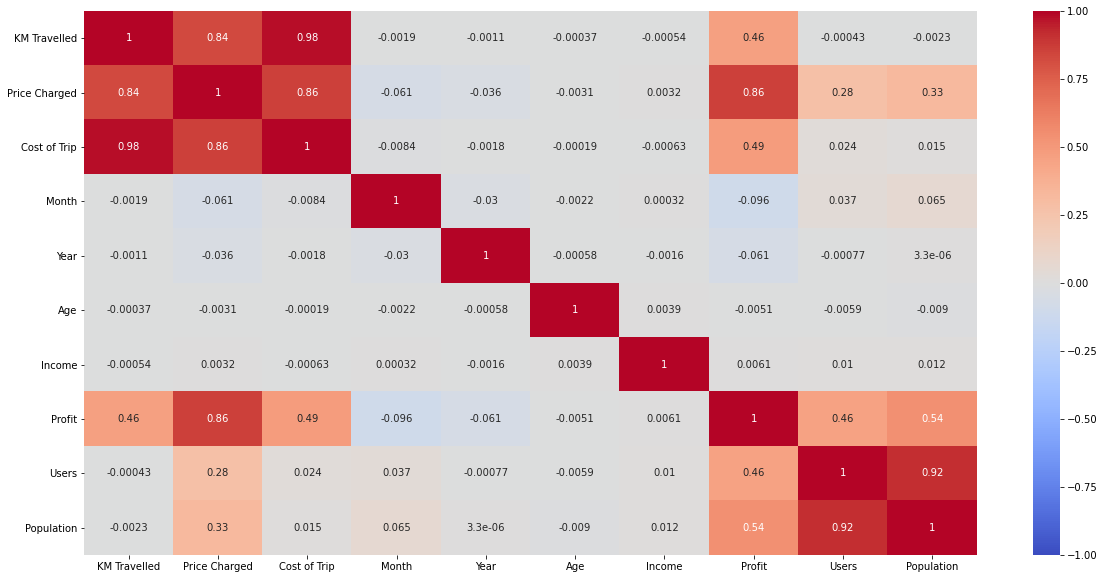

In [95]:
#Heat map 
plt.figure(figsize=(20,10))
sns.heatmap(data_df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

There is a correlation between Profit & Price Charged around 0.86, Population and Users:0.92, Cost of Trips and KM Travelled: 0.98, Price Charged and KM travelled: 0.84


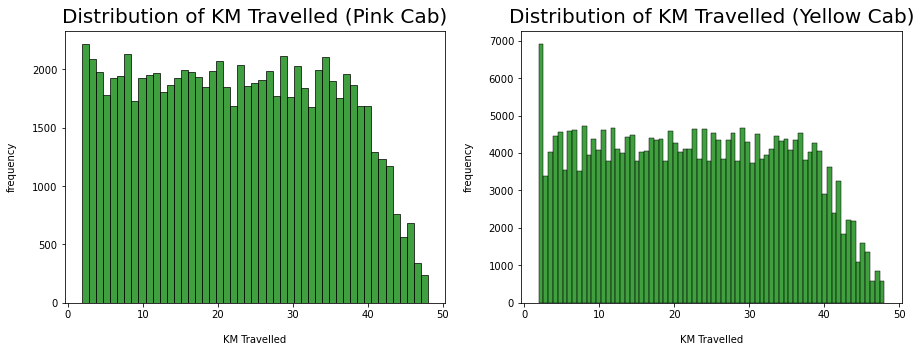

In [67]:
# Check the Range of  Distance by 2 companies
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
ax = sns.histplot(Pink_df['KM Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

plt.subplot(122)
ax = sns.histplot(Yellow_df['KM Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

plt.show()

From the above graphs and table, most of the rides start from 2KM to 48 KM. 


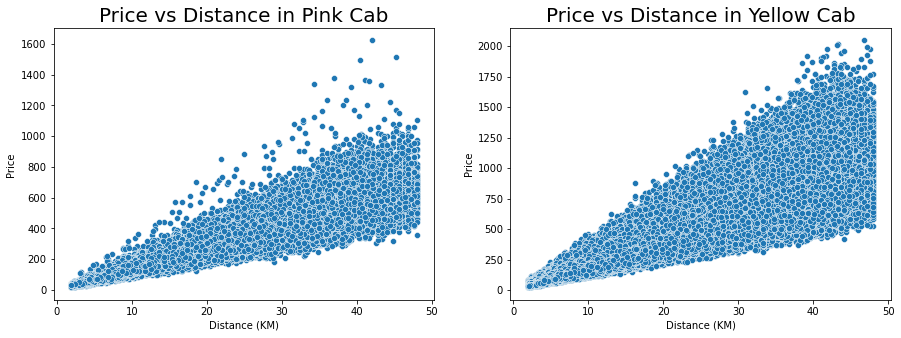

In [68]:
# Correlation between Price and Distance 
fig = plt.figure(figsize=(15,5))
plt.subplot(121)

sns.scatterplot(x = Pink_df['KM Travelled'], y= Pink_df['Price Charged'])
plt.title('Price vs Distance in Pink Cab', fontsize=20)
plt.xlabel("Distance (KM)")
plt.ylabel("Price ")

plt.subplot(122)
sns.scatterplot(x=Yellow_df['KM Travelled'], y= Yellow_df['Price Charged'])
plt.title('Price vs Distance in Yellow Cab', fontsize=20)
plt.xlabel("Distance (KM)")
plt.ylabel("Price")

plt.show()

In [69]:
print("Correlation of Price vs Distance of Pink Cab is:",Pink_df['KM Travelled'].corr(Pink_df['Price Charged']))
print("Correlation of Price vs Distance of Yellow Cab is:",Yellow_df['KM Travelled'].corr(Yellow_df['Price Charged']))


Correlation of Price vs Distance of Pink Cab is: 0.9277652782594865
Correlation of Price vs Distance of Yellow Cab is: 0.8597086294478488


There are strong and positive correlation between Price and Distance in both two cab companies. Price for riding with Yellow Cab is higher compared to Pink Cab.
Distance (KM) is one of important factors, which could impact the price when riding 

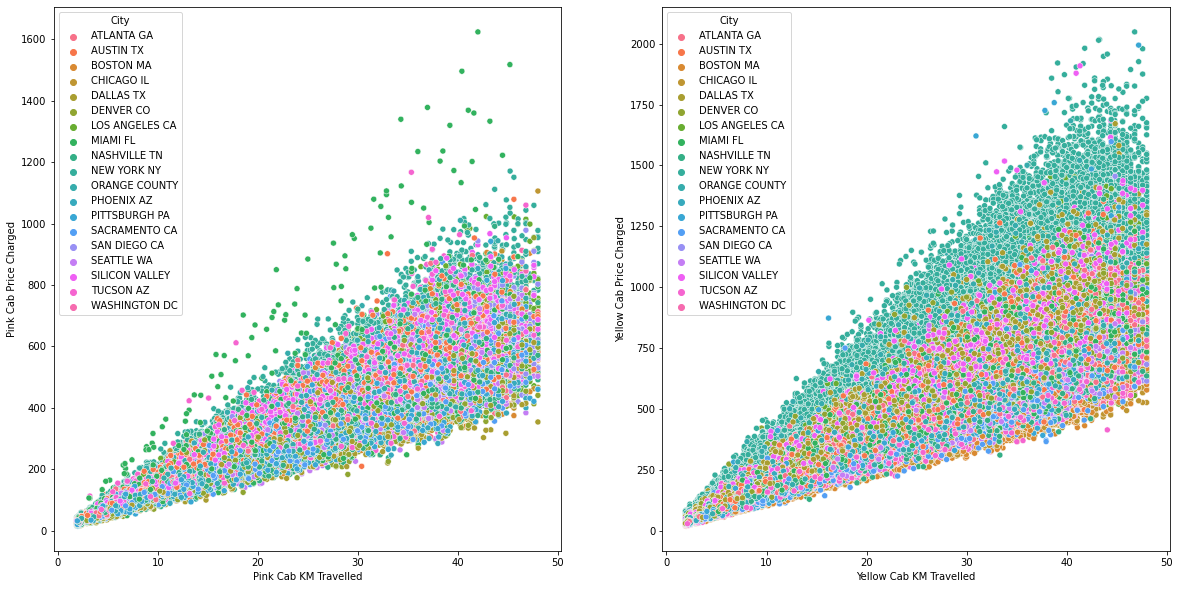

In [70]:
#Price Chared vs Distance in different cities
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.scatterplot(data=df, x=Pink_df["KM Travelled"], y=Pink_df['Price Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')
plt.subplot(122)
sns.scatterplot(data=df, x=Yellow_df["KM Travelled"], y=Yellow_df['Price Charged'], hue="City")
plt.ylabel('Yellow Cab Price Charged')
plt.xlabel('Yellow Cab KM Travelled')
plt.show()

Based on two figures, at New York City, the Yellow Cab price charged is more in comparison to the other cities. In contrast, all cities have the same increase in prices with increase in distance when riding with Pink Cab

Some of the the outliers in both grapsh might due to special situation such as extreme weathers, rush hours, or high-end cars service


## How's the distribution of customers in cities for each companies?
### Overall distribution of customers in different cities

In [89]:
#Percentage of Users
city_users = data.groupby('City').agg({"Users":"count"})
city_users.reset_index(inplace=True)
fig = px.pie(city_users, values='Users', names='City', title='Percentage of Users in different cities ')
fig.show()

New York City has the highest Cab users with 27.8%. Chicago, Los Angles and Washington are also contributed to high number of users with 15.8%, 13.4% and 12.2% respectively.


### Distribution number of customers in different cities for Yellow and Pink Cab

In [87]:
# Transaction between Yellow and Pink Company
city_p = data[data.Company=='Pink Cab'].groupby('City').agg({"Customer ID": "count"})
city_p.reset_index(inplace=True)
city_y = data[data.Company=='Yellow Cab'].groupby('City').agg({"Customer ID": "count"})
city_y.reset_index(inplace=True)
#this line to specific to create two pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Percentage of Customers per City for Pink Cab", "Percentage of Customers per City for Yellow Cab") )

# add information
pie1 = px.pie(city_p, values='Customer ID', names='City', 
              title='Percentage of Users in different cities ')
pie2 = px.pie(city_y, values='Customer ID', names='City', 
              title='Percentage of Users in different cities ')

#Location of subplots
for trace in pie1.data:
    fig.add_trace(trace, 1, 1)
for trace in pie2.data:
    fig.add_trace(trace, 1, 2)
# Options of bar chart

fig.update_layout(title_text='Percentage of Customers per City shared with Pink and Yellow Cab from different cities')
# edit axis labels
fig.show()


New York City is one of popular cities, which brought most of the profit for two companies with the numbers of users are nearly  86,000 (31.3%) for Yellow Cab compared to nearly 20,000 (23.5%) customers for Pink Cab. 

Only the number of customers riding with Pink Cab in Los Angeles followed by San Diego higher than Yellow Cab with 23.5% and 12.6% respectively compared to 10.3% and 3.5%. 

## How's the distribution of customers in big cities (Population >1M) for each companies?

Big cities here are identified the cities has more than 1 million population and customer's income also more than $5000/monthly

In [72]:
# Big overall picture about Two companies in big cities
#Income subset
Up = data[(data['Population']>1000000)&(data['Income']>5000)].groupby(['City',"Company"]).agg({"Users":"count", "Profit": "sum", "Population": "count"}).sort_values(by=["Profit",'Users'], ascending=False)
Up.reset_index(inplace=True)
#plot for overview 

fig = px.scatter(Up, y="Profit", x="Users", color='City', size='Population', facet_col="Company")
fig.update_layout(title_text='Number of Users and Profits in high population cities (pop>1M) for Yellow and Pink Cab')
fig.show()

After subset dataset only select the high population cities (more than 1 million population) and select customer with income more than 5000 month, there are some clearly facts based on the two charts, and a table for two companies:

Yellow Cab has a really good Revenue in popular cities, and New York is one of highest profit cities compared to other cities with more than 23 milion USD dollars. The second and third profitable citis are Los Angeles and Chicago with 2.88 and 2.71 million USD dollar respectively for Yellow Cab

For Pink Cab, only New York and Los Angeles are two biggest profitable cities with 1.33 and 0.99 million USD dollar whereas Chicago only brought its company 279k USD dollar. 

Interestingly, Silacon Valey, Miami and Orange County are three big city that more than 1 million population, and the customers from these cities have monthly income above 5000/ month. However, these three cities are among lowest users from both Yellow and Pink Cab. 

# Customer Behavior Analysis

## Which company has the most loyal customers?


In [75]:
#User Retention
ren_df = data.groupby(['Company', 'Customer ID']).agg({"Users":"count"}).reset_index()
fig = px.histogram(ren_df, x="Users", color= "Company", barmode='group', title="User Retention",
             color_discrete_map={'(?)':'black', 'Pink Cab':'#FC1CBF', 'Yellow Cab':'#FBE426'})
fig.update_yaxes(title_text='Count of Users')
fig.update_xaxes(title_text='Number of trips')
fig.show()

It is clearly that the number of users decrease by increasing the number of trips. 
For people riding only first time, Pink Cab is the top choice with more than 14k users for the first time riding under 2KM. Maximum number of customer for both companies for the first time was more than 14k for Pink Cab and nearly 12k for Yellow Cab.However, after 7 trips, people tend to ride with Yellow Cab compared to Pink Cab. 

## Is gender affect the Profit in both companies?

In [101]:
#Profit for each gender in both companies analysis
gen_y=data[data.Company=='Yellow Cab'].groupby('Gender').agg({"Profit":"sum"})
gen_p=data[data.Company=='Pink Cab'].groupby('Gender').agg({"Profit":"sum"})

#Reset index to column
gen_p.reset_index(inplace=True)
gen_y.reset_index(inplace=True)
#Create plot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Profit for each gender bring for Pink Cab", "Profit for each gender bring for Yellow Cab") )


pie_1 = px.pie(gen_p, values='Profit', names='Gender', 
              title='Percentage of Profitd based on Men and Women')
pie_2 = px.pie(gen_y, values='Profit', names='Gender', 
              title='Percentage of Profit based on  Men and Women ')

#Location of subplots
for trace in pie_1.data:
    fig.add_trace(trace, 1, 1)
for trace in pie_2.data:
    fig.add_trace(trace, 1, 2)
# Options of bar chart
fig.update_layout(title_text='Profit for each gender bring for Pink and Yellow Cab')
# edit axis labels
fig.show()


In general, Male customer brought more profits for both companies. For Yellow Cab, Males customers brought around $25 millon compared to $18 million by womens. 

Pink company also has the same pattern with Male customers accounted more than 50% percentage of profit brought to the company with nearly $3 millon compared to $2.3 millon with Female Customers.

However, we need to conduct t-test to find the correlation between gender and profit to decide gender really made an impact to profits for two companies 


In [104]:
#Price Charged for each gender in both companies analysis
price_y=data[data.Company=='Yellow Cab'].groupby('Gender').agg({"Price Charged":"mean"})
price_p=data[data.Company=='Pink Cab'].groupby('Gender').agg({"Price Charged":"mean"})

#Reset index to column
price_y.reset_index(inplace=True)
price_p.reset_index(inplace=True)


#Create plot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Price Charged of Pink Cab for each gender Yellow Cab", "Price Charged of Pink Cab for each gender ") )


pie_1 = px.pie(price_y, values='Price Charged', names='Gender', 
              title='Price Charged based on Men and Women')
pie_2 = px.pie(price_p, values='Price Charged', names='Gender', 
              title='Price Charged based on  Men and Women ')

#Location of subplots
for trace in pie_1.data:
    fig.add_trace(trace, 1, 1)
for trace in pie_2.data:
    fig.add_trace(trace, 1, 2)
# Options of bar chart
fig.update_layout(title_text='Price Charged for each gender bring for Yellow and Pink Cab')
# edit axis labels
fig.show()

Female Customers riding with Yellow Cab had been charged less than Male whereas both Male and Female customers riding with Pink Cab had been charged the same.


### Conduct t-test 

### Is the difference in Gender has an impact for Profit in both companies?



In [82]:
#Conduct t-test to measure the difference between Trasaction and Gender in both companies
#Yellow Cab 
F = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction').Profit.mean()
M = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction').Profit.mean()
print(F.shape[0],M.shape[0])


#import scipy to conduct testing hypothesis T-test
from scipy import stats

t, p_value = stats.ttest_ind(a = F.values,b=M.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference in Yellow Cab ')
else:
    print('We accept null hypothesis that there is no statistical difference in Yellow Cab')
    
print('P value is ', p_value)


#Pink Cab
F = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction').Profit.mean()
M = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction').Profit.mean()
print(F.shape[0],M.shape[0])

t, p_value = stats.ttest_ind(a = F.values,b=M.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference in Pink Cab')
else:
    print('We accept null hypothesis that there is no statistical difference in Pink Cab')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference in Yellow Cab 
P value is  6.060473042494144e-25
37480 47231
We accept null hypothesis that there is no statistical difference in Pink Cab
P value is  0.11515305900425798


Yellow Cab: There is difference in Profit between Male and Female customers

Pink Cab: There is no difference in Profit between Male and Female customers

Conclusion: For Yellow Cab, gender really matter in generating profit. Male Customers tend to brings more profit compared to Pink Cab. However, there are no gender different in Profit for Male and Female customers. The reason it could be because Pink Cab charged the same amount of money regrading its gender. 

# Conclusion 

Yellow Cab had made higher profit than Pink Cab in most of big cities, and the top choice for customers when riding on weekends. Yellow is leading the cab market for most of high population cities, espcially in New York, Chicago, Los Angeles, and Washington where Yellow's profit most came from these cities. 

Price Charged has a strong positive correlation with Distance, and the more distance in KM customers ride the more profit cab companies can make. Pink Cab is the most favorite for customers for their first ride while customers tend to pick yellow cab after 7 trips riding with both cab companies. 

Yellow Cab has higher price charged compared to Pink Cab charged the same amount of money regrading their genders. Most of the profit of Yellow Cab came from Male customers, and its might have an impact to their profits. 

